In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_curve, auc
from sklearn import svm
RANDOM_SEED=3412
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('data/dataAndre.csv')
train.head()

,LIMIT_BAL,SEX,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,...,AVG_PAY_LAST_4_PAY_EARLY,AVG_PAY_LAST_4_PAY_REGULAR,AVG_PAY_LAST_4_PAY_LATE,AVG_PAY_LAST_5_PAY_EARLY,AVG_PAY_LAST_5_PAY_REGULAR,AVG_PAY_LAST_5_PAY_LATE,AVG_PAY_LAST_6_PAY_EARLY,AVG_PAY_LAST_6_PAY_REGULAR,AVG_PAY_LAST_6_PAY_LATE,TOTAL_AMT_PAID
0,-0.666667,-1.0,0.437271,-0.092990,-0.010199,0.039171,0.040830,0.070589,0.224271,0.716841,...,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.042466
1,0.333333,-1.0,1.203947,1.328312,1.476448,-0.021868,-0.373816,-0.363142,0.722651,0.803505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.114537
2,0.333333,0.0,0.577945,0.617390,-0.342461,-0.376259,-0.385233,-0.366589,-0.024919,3.805066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259831
3,0.666667,0.0,-0.305669,-0.303344,-0.222676,-0.307141,-0.323469,-0.176753,0.150013,1.265634,...,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.675086
4,0.000000,0.0,-0.337061,-0.281923,-0.331430,-0.363864,0.020276,-0.353111,0.473461,-0.243428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358961


In [3]:
columns = train.columns
scaler = RobustScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=columns)

In [4]:
X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

In [5]:
#Validation set
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)


x_train.index = np.arange(len(x_train))
x_validation.index = np.arange(len(x_validation))

In [6]:
#EXTRATREESCLASSIFIER with feature selection
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0,bootstrap=True)
forest=forest.fit(X,y)

In [7]:
forest.feature_importances_

array([ 0.02505172,  0.0154843 ,  0.0182032 ,  0.017597  ,  0.01761935,
        0.01763555,  0.01735993,  0.01753108,  0.01656562,  0.01609425,
        0.01678383,  0.01601171,  0.0167157 ,  0.01862969,  0.002207  ,
        0.00085531,  0.00950806,  0.00895939,  0.00125506,  0.01065384,
        0.00040307,  0.00915976,  0.00249507,  0.00909752,  0.00433763,
        0.02497282,  0.01537513,  0.01819354,  0.01813932,  0.01823245,
        0.01791153,  0.01844178,  0.01825117,  0.01659504,  0.0168571 ,
        0.01714464,  0.01717561,  0.01727413,  0.01777518,  0.01757093,
        0.01734166,  0.01791103,  0.01735785,  0.01805596,  0.01616931,
        0.01669212,  0.01615795,  0.0163888 ,  0.01640132,  0.01676392,
        0.00660201,  0.00505763,  0.00131075,  0.00520063,  0.00586453,
        0.00133906,  0.00483087,  0.00610357,  0.00166613,  0.0052743 ,
        0.00799886,  0.00151009,  0.00678114,  0.01202829,  0.00176777,
        0.00808436,  0.01704444,  0.0028894 ,  0.01063508,  0.02

In [8]:
#To modify threshold
def get_score(threshold, probabilities, y_true):
    predicts = [1 if p >= threshold else 0 for p in probabilities]
    return f1_score(predicts, y_true)


In [9]:
#eliminate not important features
from sklearn.feature_selection import SelectFromModel
forest_model= SelectFromModel(forest,prefit=True)

In [10]:
x_new=forest_model.transform(x_train)
x_new_val=forest_model.transform(x_validation)
x_new.shape

(18818, 46)

<Container object of 84 artists>

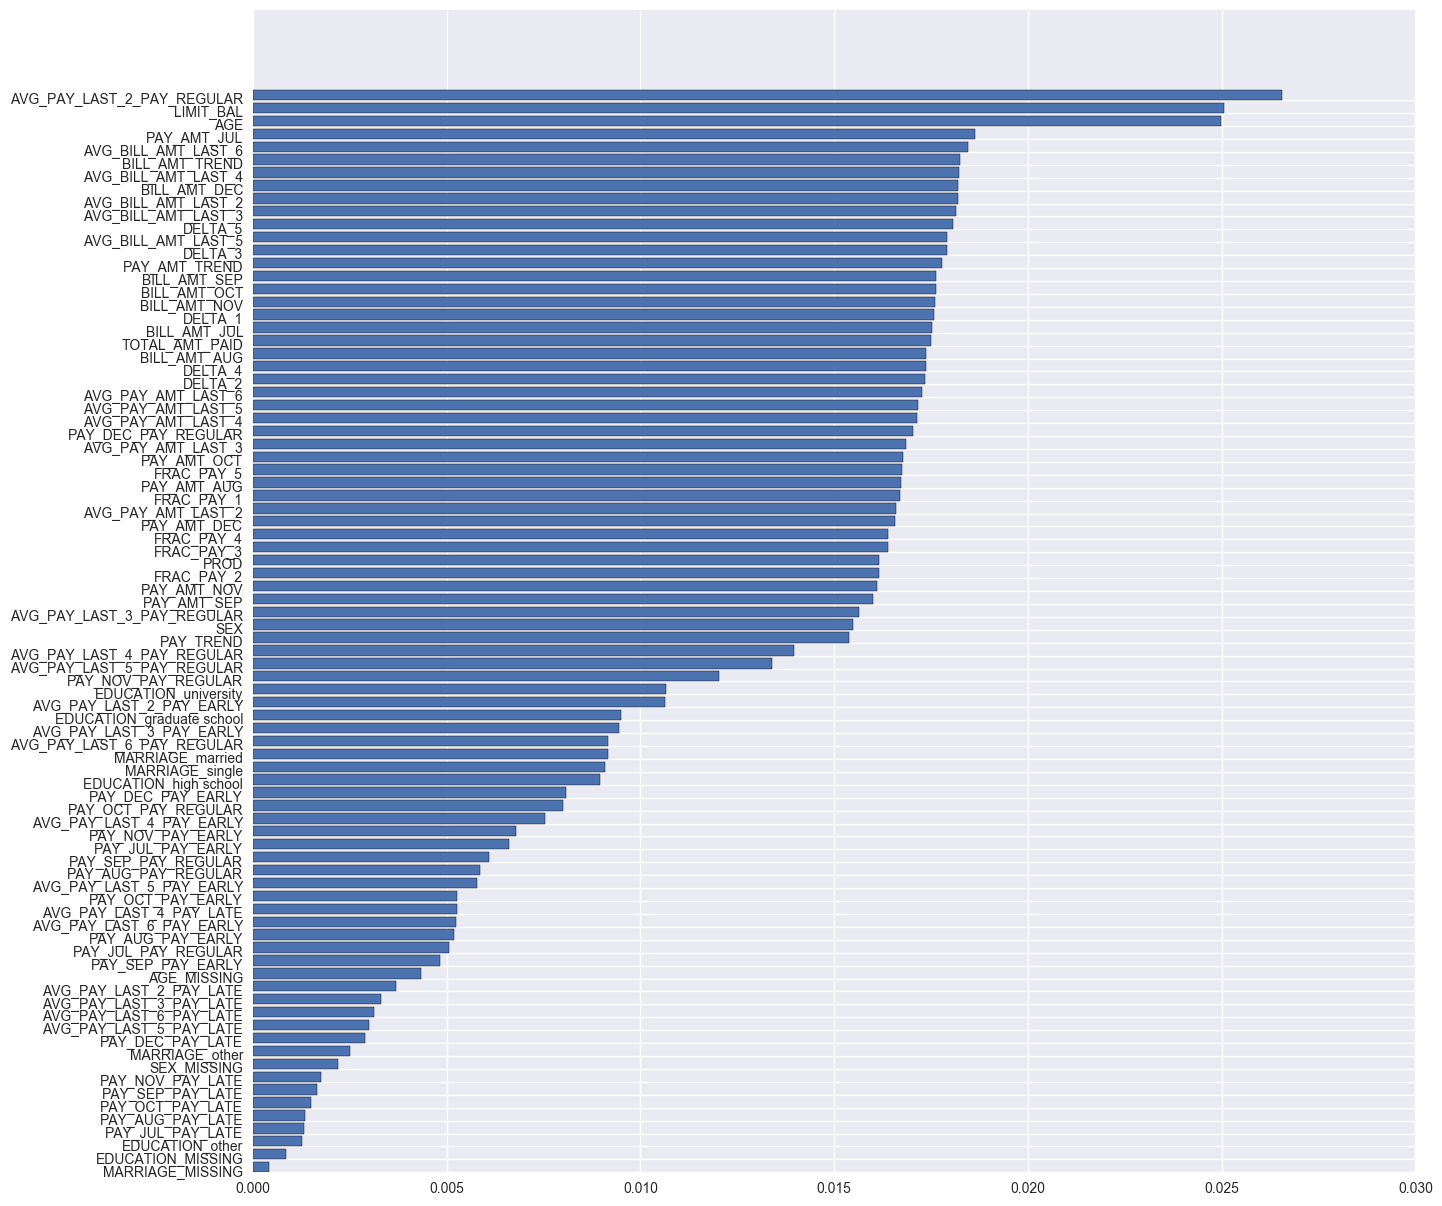

In [11]:
feature_importances = [(x, y) for x,y in zip(forest.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(15, 15))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])



In [12]:
extratrees_model=ExtraTreesClassifier(n_estimators=300,
                              random_state=0,bootstrap=True)


In [13]:
extratrees_model.fit(x_new,y_train)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [14]:
extratrees_score=cross_val_score(extratrees_model,x_new,y_train,cv=10,verbose=1)
print("accuracy:",extratrees_score.mean())

accuracy: 0.807897917373


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [15]:
extratrees_score_f1=cross_val_score(extratrees_model,x_new,y_train,cv=10,verbose=1,scoring='f1')
print("f1:",extratrees_score_f1.mean())

f1: 0.450295523706


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.0s finished


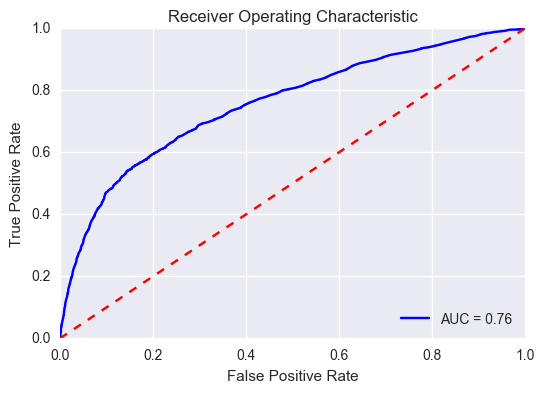

In [18]:
extratrees_pred_proba = extratrees_model.predict_proba(x_new_val)

fpr, tpr, threshold = roc_curve(y_validation, extratrees_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [19]:
scores = [get_score(t,extratrees_pred_proba[:, 1], y_validation) for t in threshold]

best_idx = scores.index(max(scores))
print(scores[best_idx])     # Migliore F1
print(best_idx)           # Indice del miglior caso

print(threshold[best_idx])    # Threshold
print(tpr[best_idx])   # true positive rate
print(fpr[best_idx])   # false positive rate

0.527472527473
315
0.31932311343
0.538418395962
0.142766194493


In [20]:
#Random Forest
rf_params = {
    'n_estimators' :  [50],
    'max_features' : ['log2'],
    'criterion' : ['gini'],
    'min_samples_split' :  [16],
    'min_samples_leaf' : [1],
    'random_state' : [RANDOM_SEED]
}

random_forest = RandomForestClassifier()
f1_scorer = make_scorer(f1_score)
rf_models = GridSearchCV(random_forest, rf_params, scoring=f1_scorer,cv=10, n_jobs=-1)
rf_models = rf_models.fit(x_train,y_train)

rf_best = rf_models.best_estimator_
rf_best = rf_best.fit(x_train, y_train)

rf_model = {
    'Name' : 'Random forest', 
    'CVScore' : rf_models.best_score_, 
    'CVStd' : rf_models.cv_results_['std_test_score'][rf_models.best_index_],
    'Result_train' : rf_best.predict(x_validation),
    'Model' : rf_best
}

In [21]:
best_idx = rf_models.best_index_
print('Best model - avg:', 
      rf_model['CVScore'],
      '+/-', 
      rf_model['CVStd'])
print()
print(rf_models.best_estimator_)

Best model - avg: 0.459773123296 +/- 0.0260995565905

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=3412,
            verbose=0, warm_start=False)


In [22]:
f1_score(rf_best.predict(x_validation), y_validation)

0.45480838756326819

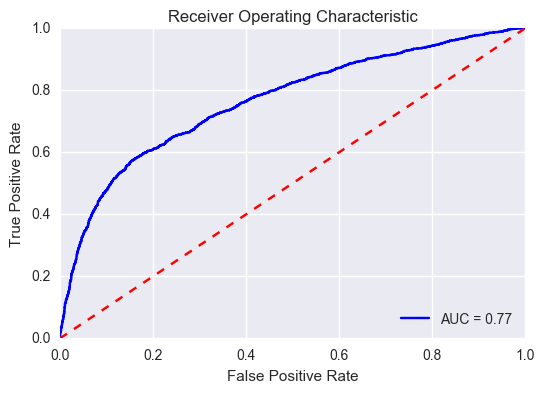

In [23]:

rf_pred_proba = rf_models.best_estimator_.predict_proba(x_validation)

fpr, tpr, threshold = roc_curve(y_validation,rf_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [24]:

scores = [get_score(t,rf_pred_proba[:, 1], y_validation) for t in threshold]

best_idx = scores.index(max(scores))
print(scores[best_idx])     # Migliore F1
print(best_idx)           # Indice del miglior caso

print(threshold[best_idx])    # Threshold
print(tpr[best_idx])   # true positive rate
print(fpr[best_idx])   # false positive rate

0.54173312068
897
0.304846700781
0.571508693214
0.152793251631


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [26]:
neigh.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
knn_score=cross_val_score(neigh,x_train,y_train,cv=10,verbose=1)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   35.4s finished


In [28]:
print ("accuracy:",knn_score.mean())

accuracy: 0.768678578867


In [29]:
knn_score_f1=cross_val_score(neigh,x_train,y_train,cv=10,verbose=1,scoring='f1')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.1s finished


In [30]:
print("f1:",knn_score_f1.mean())

f1: 0.39486638166


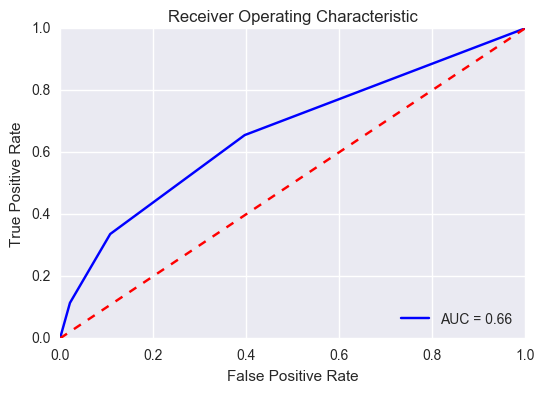

In [31]:
knn_pred_proba = neigh.predict_proba(x_validation)

fpr, tpr, threshold = roc_curve(y_validation, knn_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [32]:
scores = [get_score(t,knn_pred_proba[:, 1], y_validation) for t in threshold]

best_idx = scores.index(max(scores))
print(scores[best_idx])     # Migliore F1
print(best_idx)           # Indice del miglior caso

print(threshold[best_idx])    # Threshold
print(tpr[best_idx])   # true positive rate
print(fpr[best_idx])   # false positive rate

0.429227097485
3
0.333333333333
0.655636567583
0.397103294604


/Users/carmen/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [33]:
#Logistic Regression with feature selection of ExtratreesClass
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


lr_estimator=LogisticRegression()

In [34]:
lr_estimator.fit(x_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
lr_score=cross_val_score(lr_estimator,x_new,y_train,cv=10,verbose=1)
print ("accuracy:",lr_score.mean())

accuracy: 0.785204824431


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.6s finished


In [36]:
lr_score_f1=cross_val_score(lr_estimator,x_new,y_train,cv=10,verbose=1,scoring='f1')
print("f1:",lr_score_f1.mean())

f1: 0.237440871642


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.0s finished


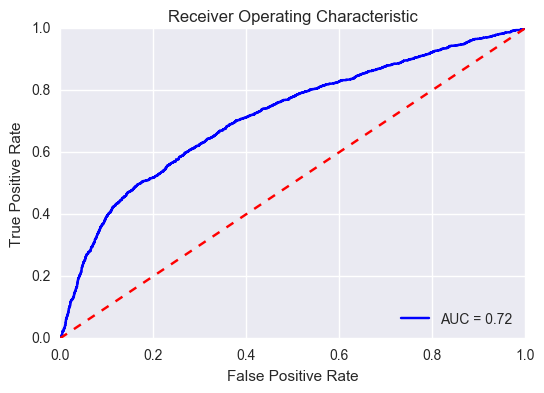

In [37]:
lr_pred_proba =lr_estimator.predict_proba(x_new_val)

fpr, tpr, threshold = roc_curve(y_validation,lr_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [38]:
scores = [get_score(t,lr_pred_proba[:, 1], y_validation) for t in threshold]

best_idx = scores.index(max(scores))
print(scores[best_idx])     # Migliore F1
print(best_idx)           # Indice del miglior caso

print(threshold[best_idx])    # Threshold
print(tpr[best_idx])   # true positive rate
print(fpr[best_idx])   # false positive rate

/Users/carmen/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.476421449744
862
0.365926255104
0.495793606282
0.166162661149
